<a href="https://colab.research.google.com/github/Lemongras89/Team_6/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%8D%D0%BC%D0%BE%D1%86%D0%B8%D0%B9_%D0%B2_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D1%85_%D1%80%D0%B0%D1%81%D1%88%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D0%BA%D0%B0%D1%85_%D0%B3%D0%BE%D0%BB%D0%BE%D1%81%D0%BE%D0%B2%D1%8B%D1%85_%D1%81%D0%BE%D0%BE%D0%B1%D1%89%D0%B5%D0%BD%D0%B8%D0%B9_%D0%9A%D0%BE%D0%BC%D0%B0%D0%BD%D0%B4%D0%B0_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В данном коде мы хотим создать максимально точную модель для классификаций эмоций на основе имеющегося датасета. Весь процесс можно поделить на следующие основные этапы:

1. Анализ задачи и данных
2. Предобработка данных
3. Разработка модели
4. Обучение и тестирование

**Анализ задачи и данных**

Определяем цели: Классифицировать текст на определенные эмоции.

Изучение данные: Проверка, сколько классов эмоций есть, сбалансирован ли датасет, и есть ли шум в данных.

Определение метрик: Для многоклассовой классификации подойдут точность, полнота, специфичность, а также средние значения по этим метрикам (macro- и weighted-метрики).

In [ ]:
import pandas as pd

# Путь к файлу
file_path = '/content/sample_data/Фразы-эмоции (1).xlsx'

# Загрузка данных
data = pd.read_excel(file_path)

# Просмотр первых строк таблицы для проверки того что всё работает
print(data.head())

                                         Текст фразы        Эмоция
0  Я не могу поверить, что ты снова опоздал на ва...  Недовольство
1  Врач, к которому меня направили, оказался груб...  Недовольство
2  Как же меня раздражает твоя привычка постоянно...  Недовольство
3  Мне кажется, что некоторые врачи просто зараба...  Недовольство
4  Мне надоело слушать твои бесконечные жалобы и ...  Недовольство


In [ ]:
# Вывод информации о данных
print(data.info())

# Просмотр уникальных значений в столбцах
for column in data.columns:
    print(f"Уникальные значения в '{column}': {data[column].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Текст фразы  1043 non-null   object
 1   Эмоция       1043 non-null   object
dtypes: object(2)
memory usage: 16.4+ KB
None
Уникальные значения в 'Текст фразы': ['Я не могу поверить, что ты снова опоздал на важную встречу, это просто неприемлемо и непростительно, я больше не намерен терпеть твои постоянные задержки и безответственное отношение к работе!'
 'Врач, к которому меня направили, оказался грубым и невнимательным человеком, который разговаривал со мной свысока, перебивал меня и не слушал мои жалобы. Он не объяснил мне, что со мной происходит, не рассказал о возможных методах лечения и даже не попытался успокоить меня.'
 'Как же меня раздражает твоя привычка постоянно перебивать других людей во время разговора, неужели так сложно дать возможность высказаться до конца?'
 ... 'Я уточню эту ин

Проверим, кол-во фраз по каждой эмоций.

In [ ]:
# Количество фраз по каждой эмоции
emotion_counts = data['Эмоция'].value_counts()

print(emotion_counts)

Эмоция
Нейтрально      204
Радость         163
Сочувствие      145
Злость          141
Печаль          133
Зависть         125
Интерес         117
Недовольство     15
Name: count, dtype: int64


Попробуем визуализировать баланс классов.

<ipython-input-7-e52a0deb76c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette='viridis')


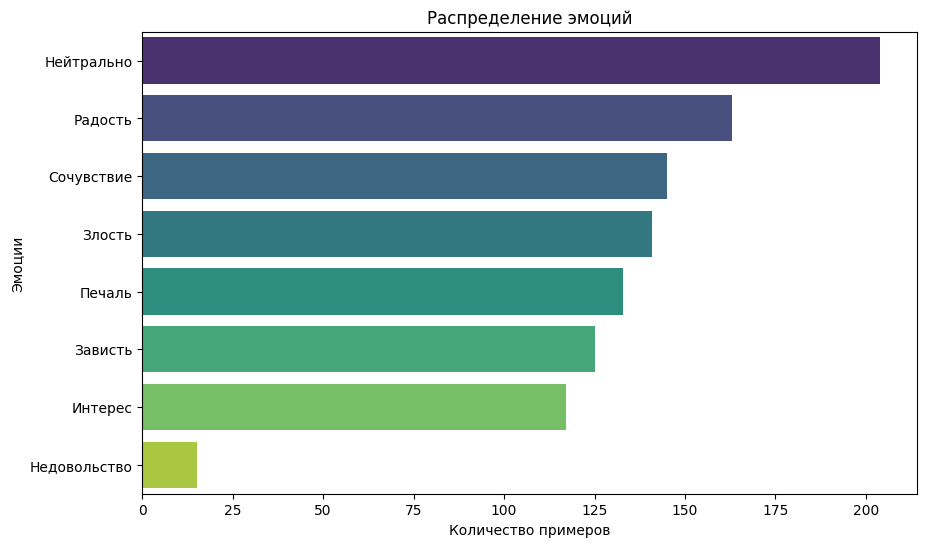

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация распределения
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette='viridis')
plt.title('Распределение эмоций')
plt.xlabel('Количество примеров')
plt.ylabel('Эмоции')
plt.show()


Как мы видим эмоций по типу "Недовольство", всего 15 штук. Этого может быть недостаточно для хорошего обучения. Разумнее всего объеденить её со "Злостью". В остальном результаты идут по нисходящей начиная от эмойицй "Нейтрально", снебольшим разрывом между собой.

In [ ]:
# Заменяем 'Недовольство' на 'Злость'
data['Эмоция'] = data['Эмоция'].replace('Недовольство', 'Злость')

#снова проверяем кол-во фраз.
emotion_counts = data['Эмоция'].value_counts()

print(emotion_counts)

Эмоция
Нейтрально    204
Радость       163
Злость        156
Сочувствие    145
Печаль        133
Зависть       125
Интерес       117
Name: count, dtype: int64


Видно, что "злости" стало больше :)

Отлично, теперь давайте продолжим исследование датсета еперд начал обучения. Например вычислим и визуализируем распределение длины текста для каждого объекта.

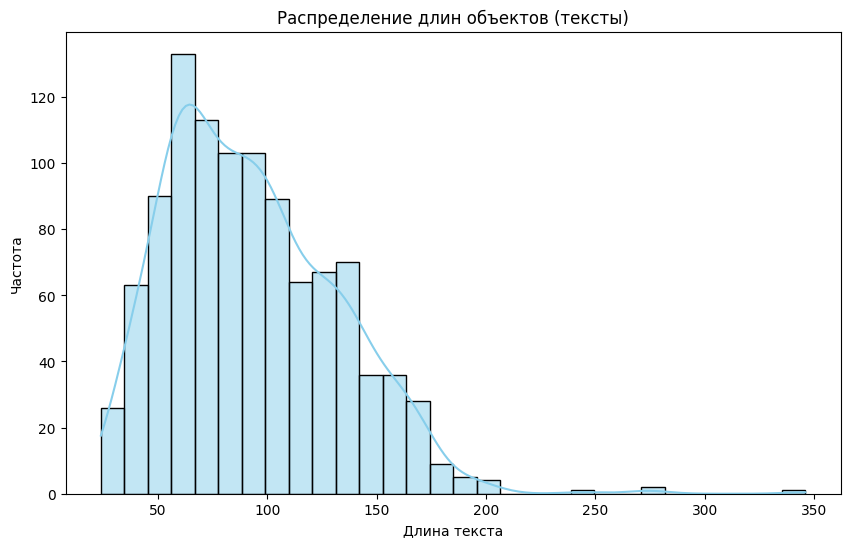

In [ ]:
# Вычисление длины текста для каждого объекта
data['Длина текста'] = data['Текст фразы'].apply(len)

# Визуализация распределения длин текста
plt.figure(figsize=(10, 6))
sns.histplot(data['Длина текста'], bins=30, kde=True, color='skyblue')
plt.title('Распределение длин объектов (тексты)')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.show()

**Предобработка данных:**

Удаляем лишние символы, строки с пропущенными значениями и проводим текст к нижнему регистру.

In [ ]:
# Удаление строк с пропущенными значениями
data = data.dropna()

# Очистка текста
import re

# Создаем функцию для этого
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Удаление пунктуации
    text = text.lower()  # Приведение к нижнему регистру
    return text

data['Текст фразы'] = data['Текст фразы'].apply(clean_text)

# Проверка результата
print(data.head())

                                         Текст фразы  Эмоция  Длина текста
0  я не могу поверить что ты снова опоздал на важ...  Злость           192
1  врач к которому меня направили оказался грубым...  Злость           274
2  как же меня раздражает твоя привычка постоянно...  Злость           148
3  мне кажется что некоторые врачи просто зарабат...  Злость           205
4  мне надоело слушать твои бесконечные жалобы и ...  Злость           123


Посмотрим на кол-во уникальных слов и на ТОП самых часто
встречающихся слов и
словосочетаний

In [ ]:
# Очистка текста и объединение всех фраз в один список слов
all_words = ' '.join(data['Текст фразы'].apply(clean_text)).split()

# Подсчет уникальных слов
unique_words = set(all_words)
print(f"Количество уникальных слов: {len(unique_words)}")

Количество уникальных слов: 3555


In [ ]:
from collections import Counter  # Импортируем Counter для подсчета частот
from nltk import ngrams

# Создание биграмм
bigrams = list(ngrams(all_words, 2))

# Подсчет частоты биграмм
bigram_counts = Counter(bigrams)

# Топ-10 биграмм
top_bigrams = bigram_counts.most_common(10)
print("\nТоп-10 самых часто встречающихся словосочетаний (биграмм):")
for bigram, count in top_bigrams:
    print(f"{' '.join(bigram)}: {count}")


Топ-10 самых часто встречающихся словосочетаний (биграмм):
у меня: 68
не могу: 62
я не: 61
что ты: 56
я так: 38
как же: 35
у тебя: 33
жаль что: 33
я просто: 30
ты не: 29


<ipython-input-19-2c1ea6983b26>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Частота', y='Биграмма', data=top_bigrams_df, palette='coolwarm')


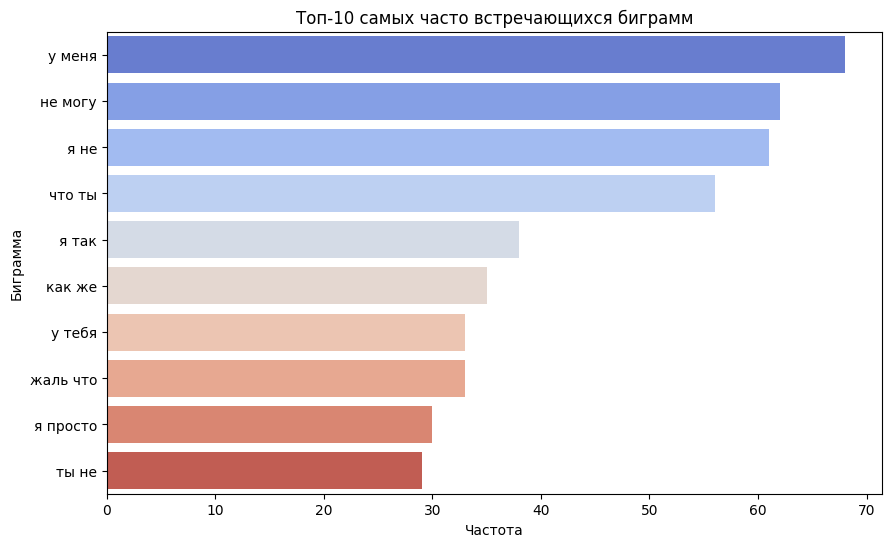

In [ ]:
# Преобразование биграмм в текстовый формат для визуализации
top_bigrams_df = pd.DataFrame(top_bigrams, columns=['Биграмма', 'Частота'])
top_bigrams_df['Биграмма'] = top_bigrams_df['Биграмма'].apply(lambda x: ' '.join(x))

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Частота', y='Биграмма', data=top_bigrams_df, palette='coolwarm')
plt.title('Топ-10 самых часто встречающихся биграмм')
plt.xlabel('Частота')
plt.ylabel('Биграмма')
plt.show()

Теперь, ради любопытства посмотрим на ТОПы,
распределения и
количества в
разрезе классов

<ipython-input-21-ad1cdcc4d5e8>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Частота', y='Слово', data=words_df, palette='coolwarm')


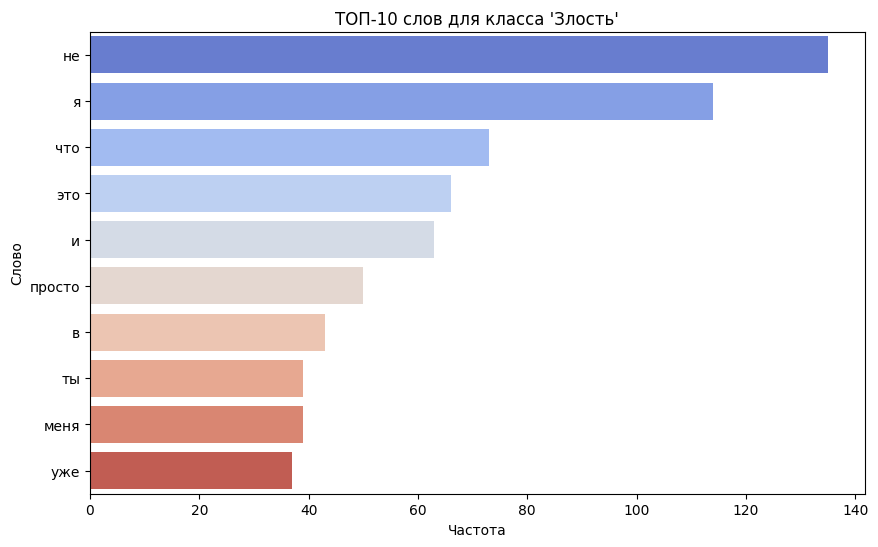

<ipython-input-21-ad1cdcc4d5e8>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Частота', y='Слово', data=words_df, palette='coolwarm')


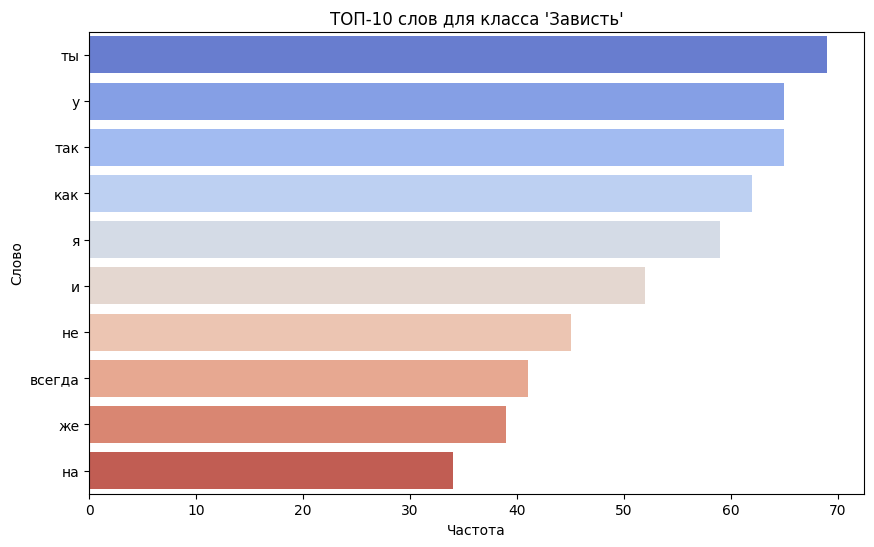

<ipython-input-21-ad1cdcc4d5e8>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Частота', y='Слово', data=words_df, palette='coolwarm')


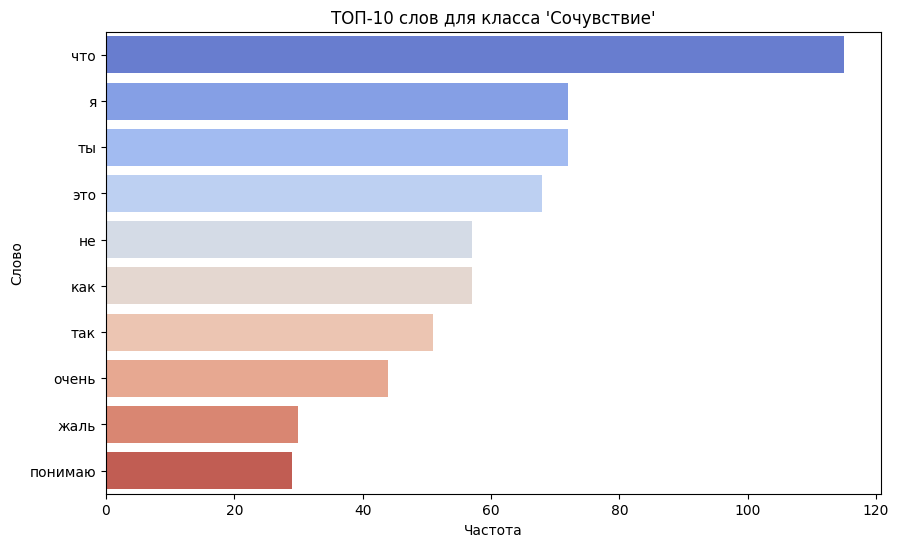

<ipython-input-21-ad1cdcc4d5e8>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Частота', y='Слово', data=words_df, palette='coolwarm')


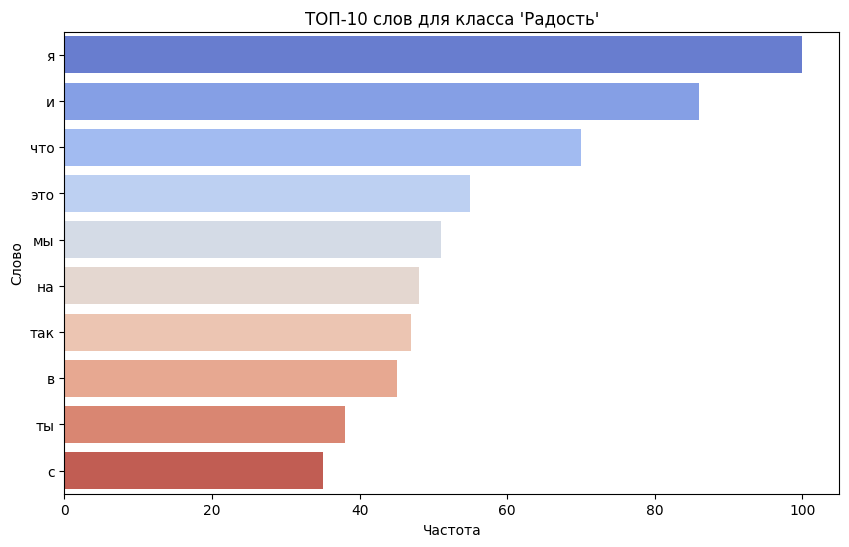

<ipython-input-21-ad1cdcc4d5e8>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Частота', y='Слово', data=words_df, palette='coolwarm')


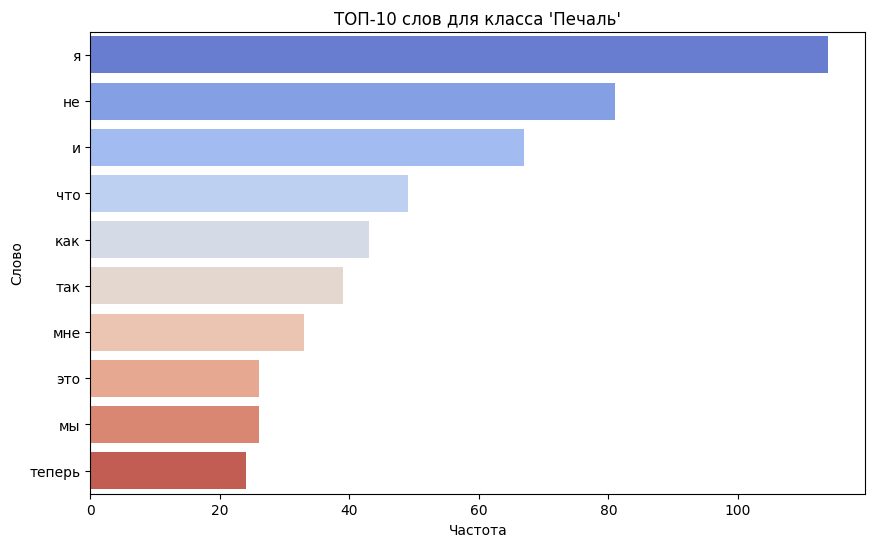

<ipython-input-21-ad1cdcc4d5e8>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Частота', y='Слово', data=words_df, palette='coolwarm')


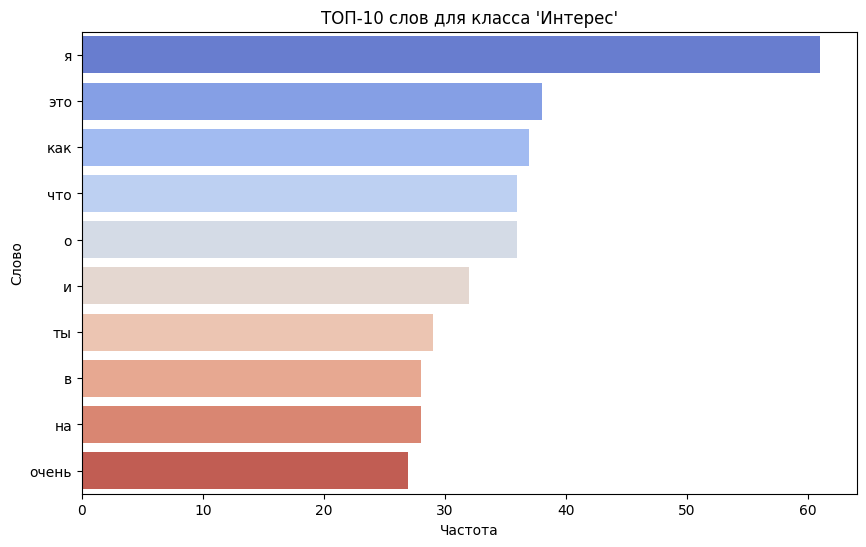

<ipython-input-21-ad1cdcc4d5e8>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Частота', y='Слово', data=words_df, palette='coolwarm')


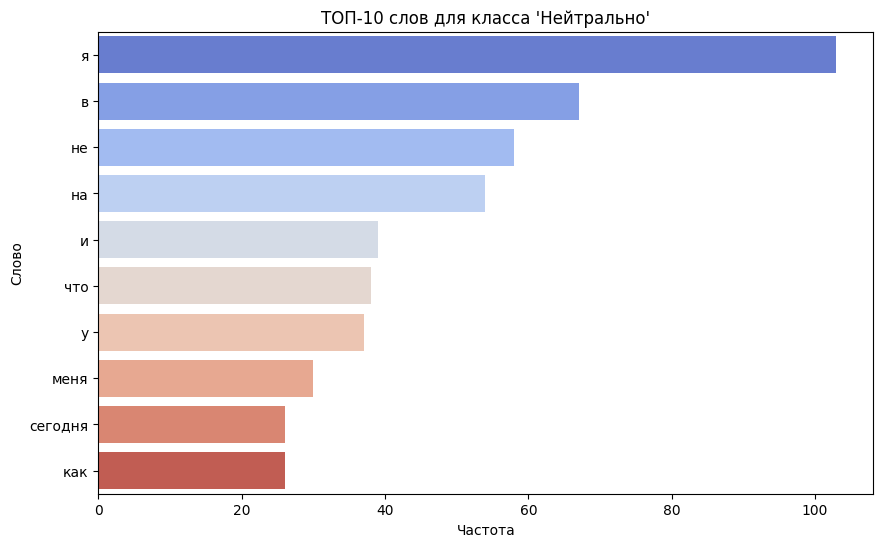

In [ ]:
# Функция для подсчета топ слов по каждому классу
def get_top_words_by_class(data, top_n=10):
    class_top_words = {}
    for emotion in data['Эмоция'].unique():
        # Очистка текста для текущего класса
        texts = data[data['Эмоция'] == emotion]['Текст фразы'].apply(clean_text)
        all_words = ' '.join(texts).split()

        # Подсчет частоты слов
        word_counts = Counter(all_words)
        class_top_words[emotion] = word_counts.most_common(top_n)
    return class_top_words

# Получение ТОП-слов для каждого класса
top_words_by_class = get_top_words_by_class(data)

# Визуализация ТОП-слов для каждого класса
for emotion, words in top_words_by_class.items():
    # Преобразуем данные для графика
    words_df = pd.DataFrame(words, columns=['Слово', 'Частота'])

    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Частота', y='Слово', data=words_df, palette='coolwarm')
    plt.title(f"ТОП-{len(words)} слов для класса '{emotion}'")
    plt.xlabel('Частота')
    plt.ylabel('Слово')
    plt.show()

Теперь, наконец приступаем к обучению. Для начала делим выборку на тренировочную и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

# Выделение признаков (X) и меток (y)
X = data['Текст фразы']
y = data['Эмоция']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки: {len(X_test)}")

Размер обучающей выборки: 834
Размер тестовой выборки: 209


Создаем пайплайн по методу - TF-IDF + Логистическая регрессия

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Создание пайплайна: TF-IDF + Логистическая регрессия
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Ограничим количество признаков для упрощения
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Обучение модели
model_pipeline.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model_pipeline.predict(X_test)

# Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7751196172248804

Classification Report:
               precision    recall  f1-score   support

     Зависть       0.86      0.86      0.86        22
      Злость       0.80      0.73      0.76        33
     Интерес       0.79      0.65      0.71        23
  Нейтрально       0.74      0.89      0.80        44
      Печаль       0.71      0.65      0.68        26
     Радость       0.72      0.72      0.72        29
  Сочувствие       0.84      0.84      0.84        32

    accuracy                           0.78       209
   macro avg       0.78      0.76      0.77       209
weighted avg       0.78      0.78      0.77       209



В целом неплохой результат - Accuracy: 0.7703349282296651.

Но можно попробовать сделать лучше. Добавим балансировку классов.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Создание пайплайна: TF-IDF + Логистическая регрессия с балансировкой классов
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Ограничим количество признаков для упрощения
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))  # Балансировка классов
])

# Обучение модели
model_pipeline.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model_pipeline.predict(X_test)

# Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7894736842105263

Classification Report:
               precision    recall  f1-score   support

     Зависть       0.79      1.00      0.88        22
      Злость       0.79      0.70      0.74        33
     Интерес       0.71      0.87      0.78        23
  Нейтрально       0.91      0.73      0.81        44
      Печаль       0.66      0.81      0.72        26
     Радость       0.83      0.66      0.73        29
  Сочувствие       0.82      0.88      0.85        32

    accuracy                           0.79       209
   macro avg       0.79      0.80      0.79       209
weighted avg       0.80      0.79      0.79       209



Результат стал лучше - Accuracy: 0.7894736842105263.

Также например по "Зависти" recall равен 1.00, что является прекрасным результатом.

Теперь протестируем модель на рандомных текстам, с которыми она не работала.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Создание пайплайна: TF-IDF + Логистическая регрессия с балансировкой классов
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Ограничим количество признаков для упрощения
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))  # Балансировка классов
])

# Обучение модели
model_pipeline.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model_pipeline.predict(X_test)

# Оценка качества модели
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Получение тренировочной точности
y_train_pred = model_pipeline.predict(X_train)
print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))

# Примеры реальных текстов для классификации
real_texts = [
    "Как она всегда всё получает, а я сижу и смотрю на её успехи. Не понимаю, почему у неё так всё легко получается, а мне приходится бороться за каждую мелочь.",  # Зависть
    "Это просто возмутительно! Почему мне всегда приходится мириться с тем, что меня игнорируют и не ценят? Сколько можно терпеть?",  # Злость
    "Я только что прочитал об этом новом научном открытии, и это звучит невероятно! Хочу узнать больше о том, как эта технология может изменить будущее.",  # Интерес
    "Сегодня был обычный день на работе. Ничего особенного не случилось. Я просто выполнял свою рутину и вернулся домой.",  # Нейтрально
    "Всё стало настолько тусклым и унылым, что я даже не могу вспомнить, когда в последний раз чувствовал себя счастливым.",  # Печаль
    "Я только что выиграл конкурс, и не могу поверить в это! Это потрясающее чувство — ощущать себя победителем. Я так рад!",  # Радость
    "Мне так больно за тебя, я понимаю, как тяжело тебе сейчас. Если тебе нужно поговорить или что-то, я всегда рядом. Ты не один в этом."  # Сочувствие
]

# Получение предсказания для реальных текстов
real_preds = model_pipeline.predict(real_texts)

# Печать результата
for text, pred in zip(real_texts, real_preds):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {pred}\n")


Test Accuracy: 0.7894736842105263

Classification Report:
               precision    recall  f1-score   support

     Зависть       0.79      1.00      0.88        22
      Злость       0.79      0.70      0.74        33
     Интерес       0.71      0.87      0.78        23
  Нейтрально       0.91      0.73      0.81        44
      Печаль       0.66      0.81      0.72        26
     Радость       0.83      0.66      0.73        29
  Сочувствие       0.82      0.88      0.85        32

    accuracy                           0.79       209
   macro avg       0.79      0.80      0.79       209
weighted avg       0.80      0.79      0.79       209


Training Accuracy: 0.9892086330935251
Text: Как она всегда всё получает, а я сижу и смотрю на её успехи. Не понимаю, почему у неё так всё легко получается, а мне приходится бороться за каждую мелочь.
Predicted Sentiment: Зависть

Text: Это просто возмутительно! Почему мне всегда приходится мириться с тем, что меня игнорируют и не ценят? Скол

Отличные результаты.

Теперь попробуем посмотреть как поведут себя другие модели. Возможно они дадут большую точность.

Модель - TF-IDF + Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Создаем пайплайн: TF-IDF + Случайный лес
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Обучение модели
rf_pipeline.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_rf = rf_pipeline.predict(X_test)

# Оценка качества модели
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6746411483253588

Classification Report (Random Forest):
               precision    recall  f1-score   support

     Зависть       0.70      0.86      0.78        22
      Злость       0.73      0.58      0.64        33
     Интерес       0.82      0.39      0.53        23
  Нейтрально       0.60      0.89      0.72        44
      Печаль       0.63      0.46      0.53        26
     Радость       0.65      0.59      0.62        29
  Сочувствие       0.74      0.81      0.78        32

    accuracy                           0.67       209
   macro avg       0.70      0.65      0.66       209
weighted avg       0.69      0.67      0.66       209



Точность - 0.6794258373205742. Теперь попробуем - TF-IDF + XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Преобразуем строковые метки в числовые
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Создаем пайплайн: TF-IDF + XGBoost
xgb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Обучение модели
xgb_pipeline.fit(X_train, y_train_encoded)

# Предсказания на тестовой выборке
y_pred_xgb = xgb_pipeline.predict(X_test)

# Преобразуем предсказания обратно в строковые метки
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Оценка качества модели
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test_encoded, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:02:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6411483253588517

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.66      0.58      0.61        33
           2       0.50      0.52      0.51        23
           3       0.57      0.66      0.61        44
           4       0.70      0.62      0.65        26
           5       0.59      0.59      0.59        29
           6       0.79      0.72      0.75        32

    accuracy                           0.64       209
   macro avg       0.65      0.64      0.64       209
weighted avg       0.65      0.64      0.64       209



Точность не очень высока - 0.6411483253588517

Что если попробовать TF-IDF + Многослойный перцептрон

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Создаем пайплайн: TF-IDF + Многослойный перцептрон
mlp_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), random_state=42))
])

# Обучение модели
mlp_pipeline.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_mlp = mlp_pipeline.predict(X_test)

# Оценка качества модели
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report (MLP):\n", classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.7703349282296651

Classification Report (MLP):
               precision    recall  f1-score   support

     Зависть       0.95      0.91      0.93        22
      Злость       0.83      0.73      0.77        33
     Интерес       0.79      0.83      0.81        23
  Нейтрально       0.80      0.73      0.76        44
      Печаль       0.62      0.58      0.60        26
     Радость       0.67      0.83      0.74        29
  Сочувствие       0.77      0.84      0.81        32

    accuracy                           0.77       209
   macro avg       0.78      0.78      0.77       209
weighted avg       0.77      0.77      0.77       209



Тут всё похоже с методом - TF-IDF + Логистическая регрессия - 0.7703349282296651

Напоследок попробуем - TF-IDF + LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Создаем пайплайн: TF-IDF + LightGBM
lgb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', lgb.LGBMClassifier(random_state=42))
])

# Обучение модели
lgb_pipeline.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_lgb = lgb_pipeline.predict(X_test)

# Оценка качества модели
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("\nClassification Report (LightGBM):\n", classification_report(y_test, y_pred_lgb))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 834, number of used features: 76
[LightGBM] [Info] Start training from score -2.091504
[LightGBM] [Info] Start training from score -1.914049
[LightGBM] [Info] Start training from score -2.182939
[LightGBM] [Info] Start training from score -1.651060
[LightGBM] [Info] Start training from score -2.053405
[LightGBM] [Info] Start training from score -1.828394
[LightGBM] [Info] Start training from score -1.998846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

Результат откровенно говоря не впечатляет - 0.569377990430622

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import torch

# Загружаем BERT и токенизатор
model_name = "DeepPavlov/bert-base-cased-conversational"  # модель для русского языка
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)

# Функция для токенизации и создания эмбеддингов
def encode_texts(texts, tokenizer, model, max_length=128):
    encoded_inputs = tokenizer.batch_encode_plus(
        texts.tolist(),
        max_length=max_length,
        padding="max_length",
        truncation=True,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(**encoded_inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # Используем [CLS]-токен

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразуем тексты в эмбеддинги
X_train_embeddings = encode_texts(X_train, tokenizer, bert_model)
X_test_embeddings = encode_texts(X_test, tokenizer, bert_model)

# Обучаем классификатор (например, логистическая регрессия)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_embeddings, y_train)

# Предсказания и оценка качества модели
y_pred = classifier.predict(X_test_embeddings)
print("BERT + Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/208k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/bert-base-cased-conversational were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERT + Logistic Regression Accuracy: 0.569377990430622

Classification Report:
               precision    recall  f1-score   support

     Зависть       0.57      0.59      0.58        22
      Злость       0.53      0.48      0.51        33
     Интерес       0.70      0.61      0.65        23
  Нейтрально       0.68      0.59      0.63        44
      Печаль       0.52      0.54      0.53        26
     Радость       0.43      0.55      0.48        29
  Сочувствие       0.59      0.62      0.61        32

    accuracy                           0.57       209
   macro avg       0.57      0.57      0.57       209
weighted avg       0.58      0.57      0.57       209



Теперь давайте попробуем использовать более сложную модель для работы с текстом. Например BERT.

In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import torch

# Загружаем BERT и токенизатор
model_name = "sberbank-ai/ruBert-base"  # модель для русского языка
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name)

# Функция для токенизации и создания эмбеддингов
def encode_texts(texts, tokenizer, model, max_length=128):
    encoded_inputs = tokenizer.batch_encode_plus(
        texts.tolist(),
        max_length=max_length,
        padding="max_length",
        truncation=True,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(**encoded_inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # Используем [CLS]-токен

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразуем тексты в эмбеддинги
X_train_embeddings = encode_texts(X_train, tokenizer, bert_model)
X_test_embeddings = encode_texts(X_test, tokenizer, bert_model)

# Обучаем классификатор (например, логистическая регрессия)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_embeddings, y_train)

# Предсказания и оценка качества модели
y_pred = classifier.predict(X_test_embeddings)
print("BERT + Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/590 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/716M [00:00<?, ?B/s]

BERT + Logistic Regression Accuracy: 0.8325358851674641

Classification Report:
               precision    recall  f1-score   support

     Зависть       0.91      0.91      0.91        22
      Злость       0.83      0.91      0.87        33
     Интерес       0.76      0.83      0.79        23
  Нейтрально       0.86      0.86      0.86        44
      Печаль       0.81      0.65      0.72        26
     Радость       0.77      0.79      0.78        29
  Сочувствие       0.87      0.84      0.86        32

    accuracy                           0.83       209
   macro avg       0.83      0.83      0.83       209
weighted avg       0.83      0.83      0.83       209



Результаты и правда стали лучше - 0.8325358851674641. Теперь можно подвести промежуточные итоги.

**Итоговые результаты:**

1. TF-IDF + Логистическая регрессия с балансировкой классов - 0.7894736842105263
2. TF-IDF + Логистическая регрессия - 0.7703349282296651
3. TF-IDF + Многослойный перцептрон - 0.7703349282296651
4. TF-IDF + Случайный лес - 0.6746411483253588
5. TF-IDF + XGBoost - 0.6411483253588517
6. TF-IDF + LightGBM - 0.569377990430622
7. BERT + Логистическая регрессия - 0.8325358851674641

**Выводы:**

Лучший результат показала комбинация BERT + Логистическая регрессия с точностью 0.8325, что значительно превышает все другие модели. Это подтверждает высокую эффективность использования трансформеров (BERT) для обработки текстовых данных, особенно при работе с большими объемами информации, где модели, обученные на больших корпусах текста, могут извлекать более глубокие и точные признаки.

TF-IDF + Логистическая регрессия с балансировкой классов продемонстрировала хороший результат (0.7895), что указывает на способность классического подхода (TF-IDF) и логистической регрессии справляться с задачей классификации, особенно при применении техник балансировки классов для устранения дисбаланса в данных.

TF-IDF + Логистическая регрессия и TF-IDF + Многослойный перцептрон показали идентичные результаты (0.7703), что говорит о схожей эффективности этих подходов в данной задаче. Несмотря на то, что многослойный перцептрон является более сложной моделью, его производительность не значительно превосходит более простую логистическую регрессию.

TF-IDF + Случайный лес (0.6746) и TF-IDF + XGBoost (0.6411) имеют значительно более низкие результаты, что может свидетельствовать о том, что для данной задачи модели с деревьями решений не способны эффективно захватывать текстовые особенности в данных. Это подтверждает важность выбора модели, которая лучше подходит для обработки текстов.

TF-IDF + LightGBM показал наименьший результат (0.5694), что указывает на его слабую способность эффективно работать с текстовыми признаками в рамках данной задачи, возможно, из-за неоптимальных гиперпараметров или недостаточной способности захватывать сложные взаимосвязи в тексте.

Общий вывод:
Для задач классификации текстов BERT + Логистическая регрессия показала наилучшие результаты и, вероятно, является наиболее эффективным решением среди протестированных моделей. В то время как более простые модели, такие как TF-IDF + Логистическая регрессия, также демонстрируют хорошие результаты, но более сложные методы, такие как многослойный перцептрон или деревья решений, не оказались столь успешными в данной задаче.